# Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import clone

In [2]:
# Globals
ORANGE = '#F2BE4A'
GRAY = '#545453'

### Prepare Dataset

In [3]:
data = pd.read_csv('./data/boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


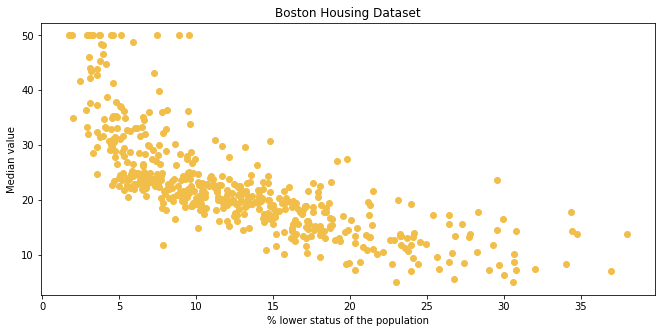

In [4]:
data = data.dropna()

X = data['lstat'].values
X = X.reshape(-1, 1)

y = data['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.figure(figsize=(11, 5))

plt.title("Boston Housing Dataset")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X, y = y, color=ORANGE)
plt.show()

In [5]:
def print_evaluation_metrics(actual_values, predictions):
    print (f'MAE: {metrics.mean_absolute_error(actual_values, predictions)}')
    print (f'MSE: {metrics.mean_squared_error(actual_values, predictions)}')
    print(f'RMSE: {sqrt(metrics.mean_squared_error(actual_values, predictions))}')
    print (f'R Squared: {metrics.r2_score(actual_values, predictions)}')

In [6]:
linear_reg = make_pipeline(StandardScaler(), LinearRegression())
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)

print_evaluation_metrics(y_test, linear_reg_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'Linear Regression Prediction': linear_reg_predictions,
})

MAE: 4.349924284477385
MSE: 33.71853518466314
RMSE: 5.80676632771314
R Squared: 0.5292973354432082


,Actual Value,Linear Regression Prediction
0,20.5,17.345491
1,5.6,8.581341
2,13.4,12.031481
3,12.6,18.822707
4,21.2,25.653589
...,...,...
97,25.0,25.395820
98,19.5,16.621755
99,19.9,18.971420
100,15.4,13.855694


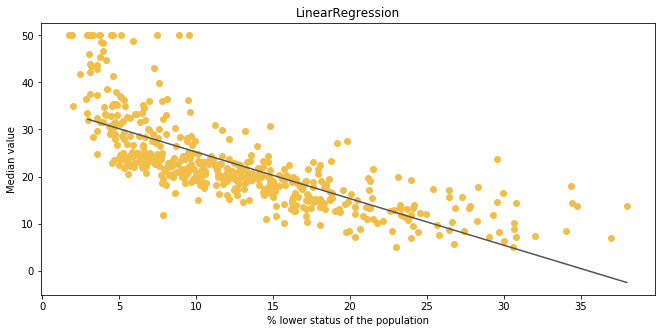

In [7]:
plt.figure(figsize=(11, 5))

plt.title("LinearRegression")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test,linear_reg_predictions))
values = values[values[:,0].argsort()]
plt.plot(values[:,0], values[:,1], color=GRAY)
plt.show()

## Ridge

### Using Sci-Kit Learn

#### Alpha = 1

In [8]:
ridge_reg = make_pipeline(StandardScaler(), Ridge(alpha=1, solver="cholesky"))
ridge_reg.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)

print_evaluation_metrics(y_test, ridge_reg_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'Ridge Prediction': ridge_reg_predictions,
})

MAE: 4.346430723361676
MSE: 33.66804991954733
RMSE: 5.802417592654576
R Squared: 0.5300020976364863


,Actual Value,Ridge Prediction
0,20.5,17.359049
1,5.6,8.616538
2,13.4,12.058160
3,12.6,18.832617
4,21.2,25.646633
...,...,...
97,25.0,25.389500
98,19.5,16.637100
99,19.9,18.980963
100,15.4,13.877868


#### Stohastic Gradient Descent with L2

In [9]:
sgd_ridge_reg = make_pipeline(StandardScaler(), SGDRegressor(penalty="l2"))
sgd_ridge_reg.fit(X_train, y_train)
sgd_ridge_reg_predictions = sgd_ridge_reg.predict(X_test)

print_evaluation_metrics(y_test, sgd_ridge_reg_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'SGD Ridge Prediction': sgd_ridge_reg_predictions,
})

MAE: 4.357165500878059
MSE: 33.78949776374881
RMSE: 5.812873451551204
R Squared: 0.5283067148579271


,Actual Value,SGD Ridge Prediction
0,20.5,17.339109
1,5.6,8.547109
2,13.4,12.008213
3,12.6,18.821018
4,21.2,25.673607
...,...,...
97,25.0,25.415018
98,19.5,16.613073
99,19.9,18.970204
100,15.4,13.838222


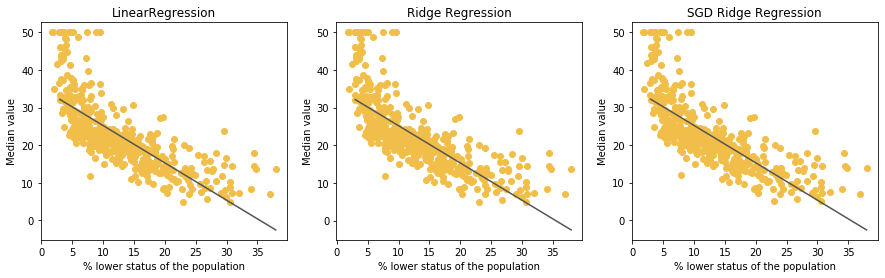

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,4))

ax1.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, linear_reg_predictions))
values = values[values[:,0].argsort()]
ax1.set_title("LinearRegression")
ax1.set_xlabel('% lower status of the population')
ax1.set_ylabel('Median value')
ax1.plot(values[:,0], values[:,1], color=GRAY)

ax2.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, ridge_reg_predictions))
values = values[values[:,0].argsort()]
ax2.set_title("Ridge Regression")
ax2.set_xlabel('% lower status of the population')
ax2.set_ylabel('Median value')
ax2.plot(values[:,0], values[:,1], color=GRAY)

ax3.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, sgd_ridge_reg_predictions))
values = values[values[:,0].argsort()]
ax3.set_title("SGD Ridge Regression")
ax3.set_xlabel('% lower status of the population')
ax3.set_ylabel('Median value')
ax3.plot(values[:,0], values[:,1], color=GRAY)

## Lasso

### Using Sci-Kit Learn

In [11]:
lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha=1))
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)

print_evaluation_metrics(y_test, lasso_reg_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'Lasso Prediction': lasso_reg_predictions,
})

MAE: 4.191410465618733
MSE: 32.00917258613768
RMSE: 5.657664941134079
R Squared: 0.5531596273670172


,Actual Value,Lasso Prediction
0,20.5,18.143094
1,5.6,10.652017
2,13.4,13.600993
3,12.6,19.405730
4,21.2,25.244364
...,...,...
97,25.0,25.024038
98,19.5,17.524487
99,19.9,19.532842
100,15.4,15.160222


In [12]:
sgd_lasso_reg = make_pipeline(StandardScaler(), SGDRegressor(penalty="l1"))
sgd_lasso_reg.fit(X_train, y_train)
sgd_lasso_reg_predictions = sgd_lasso_reg.predict(X_test)

print_evaluation_metrics(y_test, sgd_lasso_reg_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'SGD Lasso Prediction': sgd_lasso_reg_predictions,
})

MAE: 4.351841291760927
MSE: 33.76185189745489
RMSE: 5.810494978696298
R Squared: 0.5286926445211602


,Actual Value,SGD Lasso Prediction
0,20.5,17.328398
1,5.6,8.545018
2,13.4,12.002728
3,12.6,18.808854
4,21.2,25.654724
...,...,...
97,25.0,25.396389
98,19.5,16.603073
99,19.9,18.957893
100,15.4,13.830943


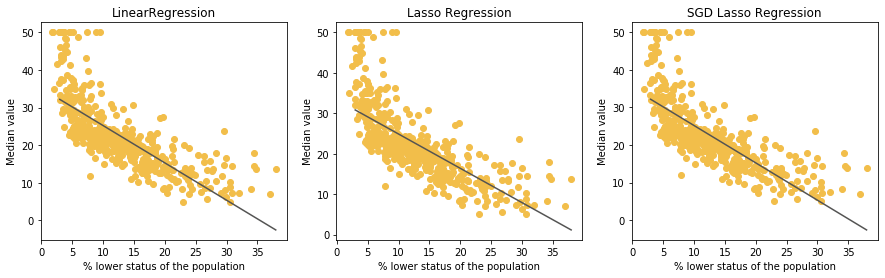

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,4))

ax1.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, linear_reg_predictions))
values = values[values[:,0].argsort()]
ax1.set_title("LinearRegression")
ax1.set_xlabel('% lower status of the population')
ax1.set_ylabel('Median value')
ax1.plot(values[:,0], values[:,1], color=GRAY)

ax2.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, lasso_reg_predictions))
values = values[values[:,0].argsort()]
ax2.set_title("Lasso Regression")
ax2.set_xlabel('% lower status of the population')
ax2.set_ylabel('Median value')
ax2.plot(values[:,0], values[:,1], color=GRAY)

ax3.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, sgd_lasso_reg_predictions))
values = values[values[:,0].argsort()]
ax3.set_title("SGD Lasso Regression")
ax3.set_xlabel('% lower status of the population')
ax3.set_ylabel('Median value')
ax3.plot(values[:,0], values[:,1], color=GRAY)

## ElasticNet

### Using Sci-Kit Learn

In [14]:
elastic_net_reg = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))
elastic_net_reg.fit(X_train, y_train)
elastic_net_reg_predictions = elastic_net_reg.predict(X_test)

print_evaluation_metrics(y_test, elastic_net_reg_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'ElasticNet Prediction': elastic_net_reg_predictions,
})

MAE: 4.279460546855516
MSE: 32.776048508799335
RMSE: 5.725036987548581
R Squared: 0.5424542234043481


,Actual Value,ElasticNet Prediction
0,20.5,17.644944
1,5.6,9.358756
2,13.4,12.620739
3,12.6,19.041597
4,21.2,25.499949
...,...,...
97,25.0,25.256238
98,19.5,16.960677
99,19.9,19.182200
100,15.4,14.345466


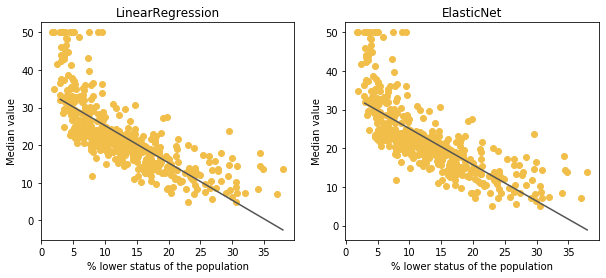

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, linear_reg_predictions))
values = values[values[:,0].argsort()]
ax1.set_title("LinearRegression")
ax1.set_xlabel('% lower status of the population')
ax1.set_ylabel('Median value')
ax1.plot(values[:,0], values[:,1], color=GRAY)

ax2.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, elastic_net_reg_predictions))
values = values[values[:,0].argsort()]
ax2.set_title("ElasticNet")
ax2.set_xlabel('% lower status of the population')
ax2.set_ylabel('Median value')
ax2.plot(values[:,0], values[:,1], color=GRAY)

## Early Stopping

In [16]:
sgd_reg = SGDRegressor(penalty="elasticnet", early_stopping = True, alpha=11)
X_train = StandardScaler().fit_transform(X_train)

sgd_reg.fit(X_train, y_train)
sgd_reg_predictions = sgd_reg.predict(X_test)

print_evaluation_metrics(y_test, sgd_reg_predictions)

pd.DataFrame({
    'Actual Value': y_test,
    'SGD with Early Stopping': sgd_reg_predictions,
})

MAE: 5.432452178486986
MSE: 60.46609011128903
RMSE: 7.775994477318578
R Squared: 0.15590788345810025


,Actual Value,SGD with Early Stopping
0,20.5,15.217084
1,5.6,11.565403
2,13.4,13.002942
3,12.6,15.832582
4,21.2,18.678745
...,...,...
97,25.0,18.571343
98,19.5,14.915531
99,19.9,15.894545
100,15.4,13.763021


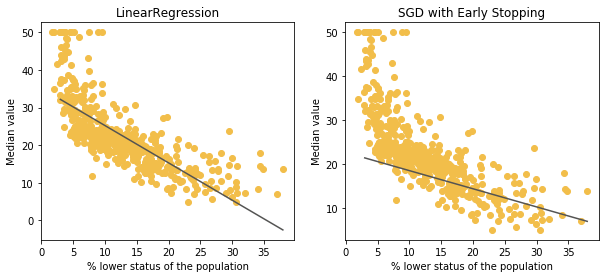

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, linear_reg_predictions))
values = values[values[:,0].argsort()]
ax1.set_title("LinearRegression")
ax1.set_xlabel('% lower status of the population')
ax1.set_ylabel('Median value')
ax1.plot(values[:,0], values[:,1], color=GRAY)

ax2.scatter(x = X, y = y, color=ORANGE)
values = np.column_stack((X_test, sgd_reg_predictions))
values = values[values[:,0].argsort()]
ax2.set_title("SGD with Early Stopping")
ax2.set_xlabel('% lower status of the population')
ax2.set_ylabel('Median value')
ax2.plot(values[:,0], values[:,1], color=GRAY)